# Praca domowa 6

## Zadanie 1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com//MI2-Education//2023L-ExploratoryDataAnalysis//main//homeworks//hw6//house_data.csv")

In [ ]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


1. Jaka jest średnia cena nieruchomości położonych nad wodą, których jakoś wykończenia jest równa lub większa od mediany jakości wykończenia?


In [ ]:
df[(df["grade"] >= df["grade"].median()) & df["waterfront"] == 1]["price"].mean()


1784151.7006802722

Odp: 1784151.7006802722

2. Czy nieruchomości o 2 piętrach mają większą (w oparciu o wartości mediany) liczbę łazienek niż nieruchomości o 3 piętrach?


In [ ]:
df[df['floors'] == 2]['bathrooms'].median() > df[df['floors'] == 3]['bathrooms'].median()

False

Odp: NIE

3. Jak wygląda wartość kwartyla 0.25 oraz 0.75 jakości wykończenia nieruchomości położonych na północy biorąc pod uwagę czy ma ona widok na wodę czy nie ma?

In [ ]:
polnocne_all = df[df['lat'] > (df['lat'].max() + df['lat'].min())/2]
polnocne_all_groupby = polnocne_all.groupby("waterfront")["grade"]
polnocne_all_groupby.quantile([0.25, 0.75])




waterfront      
0           0.25     7.0
            0.75     8.0
1           0.25     8.0
            0.75    10.0
Name: grade, dtype: float64

Odp: Bez widoku na wodę: 0.25 - 7.0, 0.75 - 8.0.
     Z widokiem na wodę: 0.25 - 8.0, 0.75 - 10.0.

4. Pod którym kodem pocztowy jest położonych najwięcej nieruchomości i jaki jest rozstęp miedzykwartylowy dla ceny nieruchomości położonych pod tym adresem?

In [ ]:
kod_max = df['zipcode'].value_counts().idxmax()
kod_max

98103

In [ ]:

max_nieruchomosci = df[df['zipcode'] == kod_max]
max_nieruchomosci['price'].quantile(0.75) - max_nieruchomosci['price'].quantile(0.25)


262875.0

Odp: kod: 98103,
     IQR: 262875.0

5. Ile procent nieruchomości ma wyższą średnią powierzchnię 15 najbliższych sąsiadów względem swojej powierzchni?

In [ ]:
df[df['sqft_lot'] < df['sqft_lot15']].size / df.size * 100

39.513255910794435

Odp: ~ 39.5% 

 6. O ile procent więcej jest nieruchomości leżcych na północy zachód niż  nieruchomości leżących na południowy wschód?

In [ ]:
poln_zach = df[(df['lat'] > (df['lat'].max() + df['lat'].min())/2) & (df['long'] < (df['long'].max() + df['long'].min())/2)]
polud_wsch = df[(df['lat'] < (df['lat'].max() + df['lat'].min())/2) & (df['long'] > (df['long'].max() + df['long'].min())/2)]

(poln_zach.size - polud_wsch.size) / polud_wsch.size * 100 

18343.529411764706

Odp: ~ 18343.5 %

# Zadanie 2

Dla wybranej zmiennej ze zbioru danych z Zadania 1 narysuj:

a) rozkład zmiennej jakościowej

b) rozkład zmiennej ilościowej

c) rozkład dwóch zmiennych (dowolna kombinacja jakościowej i ilościowej)

a)

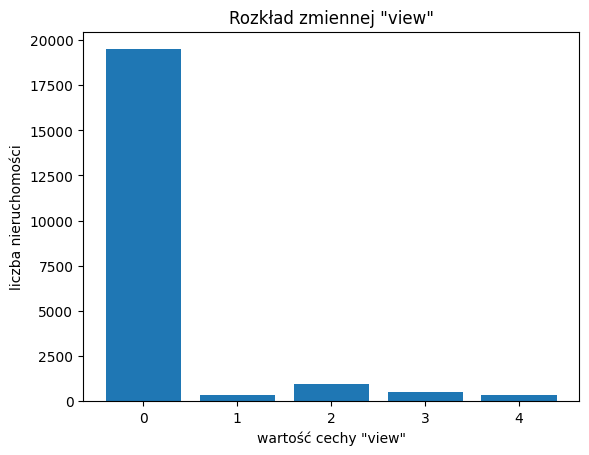

In [ ]:
widoki = df['view'].value_counts().sort_index()
plt.bar(widoki.index, widoki.values)
plt.title('Rozkład zmiennej "view"')
plt.xlabel('wartość cechy "view"')
plt.ylabel('liczba nieruchomości')

plt.show()

b)

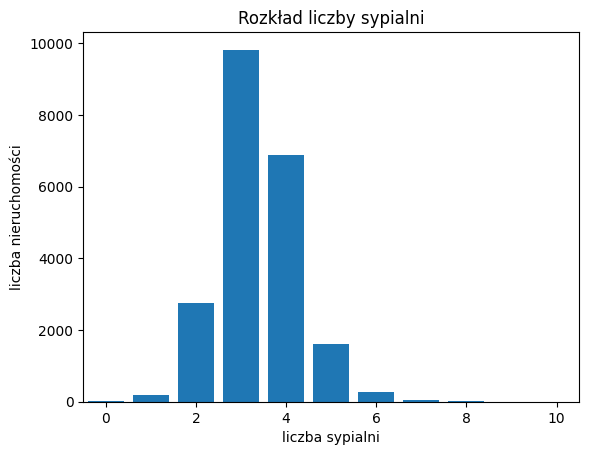

In [ ]:
sypialnie = df['bedrooms'].value_counts().sort_index() #liczba sypialni moim zdaniem jest zmienną ilościową
plt.bar(sypialnie.index, sypialnie.values)
plt.title('Rozkład liczby sypialni')
plt.xlabel('liczba sypialni')
plt.xlim(-0.5,10.5) # przyjąłem limit 10, bo i tak tu już nic nie widać, nawet dla większych wartości 
plt.ylabel('liczba nieruchomości')

plt.show()

c)

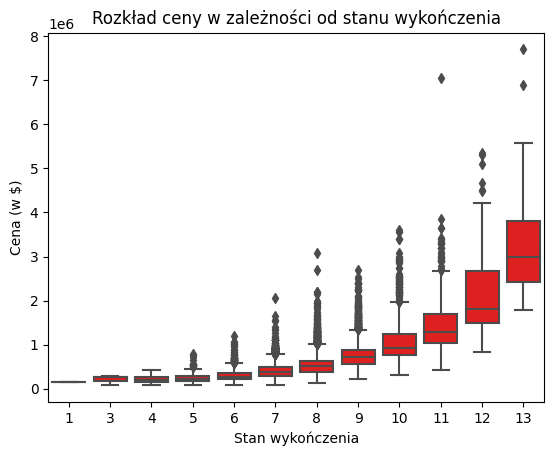

In [ ]:
sns.boxplot(data=df, x='grade', y='price', color = "red")
plt.title("Rozkład ceny w zależności od stanu wykończenia")
plt.xlabel("Stan wykończenia")
plt.ylabel("Cena (w $)")

plt.show()